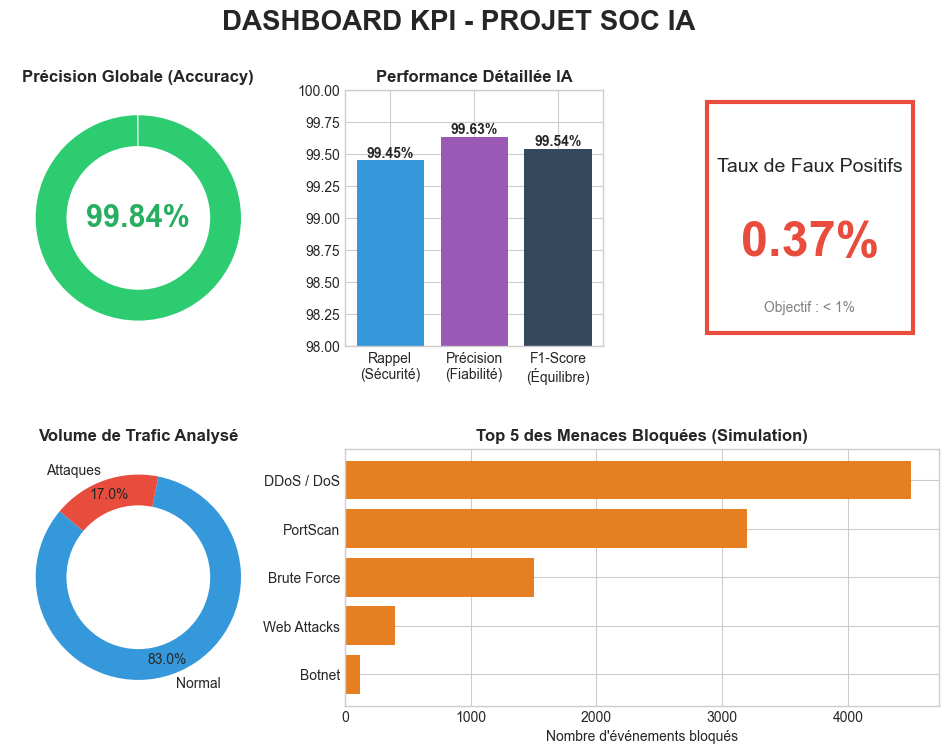

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Configuration du style
plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(12, 8))
fig.suptitle('DASHBOARD KPI - PROJET SOC IA', fontsize=20, fontweight='bold', y=0.98)

# Création de la grille (2 lignes, 3 colonnes)
grid = plt.GridSpec(2, 3, hspace=0.4, wspace=0.3)

# =============================================
# 1. JAUGE DE PERFORMANCE (ACCURACY)
# =============================================
ax1 = fig.add_subplot(grid[0, 0])
# Données
sizes = [99.84, 0.16]
colors = ['#2ecc71', '#ecf0f1'] # Vert et Gris clair
ax1.pie(sizes, colors=colors, startangle=90, counterclock=False, wedgeprops={'width':0.3})
ax1.text(0, 0, '99.84%', ha='center', va='center', fontsize=22, fontweight='bold', color='#27ae60')
ax1.set_title("Précision Globale (Accuracy)", fontsize=12, fontweight='bold')

# =============================================
# 2. LES 3 MÉTRIQUES CLÉS (BARRES)
# =============================================
ax2 = fig.add_subplot(grid[0, 1])
metrics = ['Rappel\n(Sécurité)', 'Précision\n(Fiabilité)', 'F1-Score\n(Équilibre)']
values = [99.45, 99.63, 99.54]
bars = ax2.bar(metrics, values, color=['#3498db', '#9b59b6', '#34495e'])
ax2.set_ylim(98, 100) # On zoom pour voir les différences
ax2.set_title("Performance Détaillée IA", fontsize=12, fontweight='bold')
# Ajouter les valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}%', ha='center', va='bottom', fontweight='bold')

# =============================================
# 3. TAUX DE FAUX POSITIFS (BANDEAU ROUGE)
# =============================================
ax3 = fig.add_subplot(grid[0, 2])
ax3.axis('off')
ax3.text(0.5, 0.7, "Taux de Faux Positifs", ha='center', va='center', fontsize=14)
ax3.text(0.5, 0.4, "0.37%", ha='center', va='center', fontsize=35, fontweight='bold', color='#e74c3c')
ax3.text(0.5, 0.15, "Objectif : < 1%", ha='center', va='center', fontsize=10, color='gray')
# Petit rectangle rouge pour le style
rect = plt.Rectangle((0.1, 0.05), 0.8, 0.9, fill=False, edgecolor='#e74c3c', linewidth=3)
ax3.add_patch(rect)

# =============================================
# 4. RÉPARTITION DU TRAFIC (DONUT)
# =============================================
ax4 = fig.add_subplot(grid[1, 0])
labels = ['Normal', 'Attaques']
sizes_trafic = [83, 17] # Exemple représentatif
colors_trafic = ['#3498db', '#e74c3c']
ax4.pie(sizes_trafic, labels=labels, colors=colors_trafic, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
# Cercle blanc au milieu pour faire un Donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
ax4.add_artist(centre_circle)
ax4.set_title("Volume de Trafic Analysé", fontsize=12, fontweight='bold')

# =============================================
# 5. TYPOLOGIE DES ATTAQUES (HORIZONTALE)
# =============================================
ax5 = fig.add_subplot(grid[1, 1:]) # Prend 2 colonnes
attacks = ['DDoS / DoS', 'PortScan', 'Brute Force', 'Web Attacks', 'Botnet']
counts = [4500, 3200, 1500, 400, 120] # Exemple fictif réaliste
y_pos = np.arange(len(attacks))

ax5.barh(y_pos, counts, align='center', color='#e67e22')
ax5.set_yticks(y_pos)
ax5.set_yticklabels(attacks)
ax5.invert_yaxis()  # La plus grande en haut
ax5.set_xlabel('Nombre d\'événements bloqués')
ax5.set_title("Top 5 des Menaces Bloquées (Simulation)", fontsize=12, fontweight='bold')

# Sauvegarde et Affichage
plt.savefig('dashboard_kpi_neurosoc.png', dpi=300)
plt.show()